### **1. Importing Libraries**

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

plt.style.use("seaborn-v0_8")

### **2. Load Data**

This workbook contains three sheets:

- Student_Master
- Lecture_List (ignored for now)
- Attendance_Database (main analysis sheet)

**Setting the File Path**

Using structured project paths via pathlib.

In [261]:
from pathlib import Path

# Get project root (one level above notebooks/)
PROJECT_ROOT = Path().resolve().parent

# Define data directory
DATA_DIR = PROJECT_ROOT / "data"

# Define file path
file_path = DATA_DIR / "Dummy_Data.xlsm"

print("Project Root:", PROJECT_ROOT)
print("File Path:", file_path)

Project Root: C:\Users\DELL\Desktop\Tanmay\End Sem PBL\end-sem-practical-pbl\Analysis
File Path: C:\Users\DELL\Desktop\Tanmay\End Sem PBL\end-sem-practical-pbl\Analysis\data\Dummy_Data.xlsm


**Reading the required sheet**

In [262]:
student_master = pd.read_excel(
    file_path,
    sheet_name="Students_Master",
    engine="openpyxl"
)

attendance_df = pd.read_excel(
    file_path,
    sheet_name="Attendance_Database",
    engine="openpyxl"
)

from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path().resolve().parent
DATA_DIR = PROJECT_ROOT / "data"
file_path = DATA_DIR / "Dummy_Data.xlsm"

attendance_df = pd.read_excel(
    file_path,
    sheet_name="Attendance_Database",
    engine="openpyxl"
)

### 3. **Data Inspection & Validation**

Initial structural checks before cleaning and analysis.

In [263]:
attendance_df.head()

,Date,Time,Batch,PRN,Name,Present
0,2026-02-23,09:30:00,D2,2501132081,Deshpande Aditya Milind,1
1,2026-02-23,09:30:00,D2,2501132082,Devisree Chennu,0
2,2026-02-23,09:30:00,D2,2501132083,Smriti Pramanik,0
3,2026-02-23,09:30:00,D2,2501132086,Shirawale Sanskar Jeevan,1
4,2026-02-23,09:30:00,D2,2501132090,Bhosale Sneha Tushar,0


In [264]:
attendance_df.columns

Index(['Date', 'Time', 'Batch', 'PRN', 'Name', 'Present'], dtype='str')

In [265]:
attendance_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     93 non-null     datetime64[us]
 1   Time     93 non-null     object        
 2   Batch    93 non-null     str           
 3   PRN      93 non-null     int64         
 4   Name     93 non-null     str           
 5   Present  93 non-null     int64         
dtypes: datetime64[us](1), int64(2), object(1), str(2)
memory usage: 4.5+ KB


In [266]:
attendance_df.isna().sum()

Date       0
Time       0
Batch      0
PRN        0
Name       0
Present    0
dtype: int64

In [267]:
attendance_df["Present"].value_counts()

Present
0    59
1    34
Name: count, dtype: int64

### **4. Data Cleaning & Type Standardization**

Converting columns to correct data types and ensuring structural consistency.

In [268]:
# Removing the leading and trailing spaces
attendance_df.columns = attendance_df.columns.str.strip()
attendance_df.columns

Index(['Date', 'Time', 'Batch', 'PRN', 'Name', 'Present'], dtype='str')

In [269]:
# Converting the Date Column

attendance_df['Date'] = pd.to_datetime(
    attendance_df['Date'],
    errors="coerce"
) 

attendance_df['Date'].dtype

dtype('<M8[us]')

*Resolving Time Issue*

In [270]:
print("Dtype:", attendance_df["Time"].dtype)
print("\nFirst 10 values:")
print(attendance_df["Time"].head(10))

print("\nUnique sample:")
print(attendance_df["Time"].unique()[:10])

Dtype: object

First 10 values:
0    09:30:00
1    09:30:00
2    09:30:00
3    09:30:00
4    09:30:00
5    09:30:00
6    09:30:00
7    09:30:00
8    09:30:00
9    09:30:00
Name: Time, dtype: object

Unique sample:
[datetime.time(9, 30) datetime.time(11, 30)]


In [271]:
# Converting the Time Column

print("Before conversion : ",attendance_df["Time"].dtype)

attendance_df["Time"] = pd.to_datetime(
    attendance_df["Time"].astype(str),
    format="%H:%M:%S"
)

print("Head : ",attendance_df["Time"].head())
print("Dtype : ",attendance_df["Time"].dtype)

Before conversion :  object
Head :  0   1900-01-01 09:30:00
1   1900-01-01 09:30:00
2   1900-01-01 09:30:00
3   1900-01-01 09:30:00
4   1900-01-01 09:30:00
Name: Time, dtype: datetime64[us]
Dtype :  datetime64[us]


In [272]:
# Ensuring the attendance is only 0 and 1

attendance_df["Present"] = pd.to_numeric(
    attendance_df['Present'],
    errors="coerce"
)

attendance_df['Present'].dtype

dtype('int64')

In [273]:
# Making the PRN as String cause sometimes excel convert them into scientific number

attendance_df["PRN"] = attendance_df["PRN"].astype(str)
attendance_df["PRN"].head()

0    2501132081
1    2501132082
2    2501132083
3    2501132086
4    2501132090
Name: PRN, dtype: str

*Cleaning Date and Time together*

In [274]:
# Combine Date and Time into single DateTime column
attendance_df['DateTime'] = pd.to_datetime(
    attendance_df['Date'].dt.strftime('%Y-%m-%d') + ' ' +
    attendance_df['Time'].dt.strftime('%H:%M:%S')
)

# Drop original Date and Time column (safe to remove)
attendance_df.drop(columns=['Date', 'Time'], inplace=True)

attendance_df.head()

,Batch,PRN,Name,Present,DateTime
0,D2,2501132081,Deshpande Aditya Milind,1,2026-02-23 09:30:00
1,D2,2501132082,Devisree Chennu,0,2026-02-23 09:30:00
2,D2,2501132083,Smriti Pramanik,0,2026-02-23 09:30:00
3,D2,2501132086,Shirawale Sanskar Jeevan,1,2026-02-23 09:30:00
4,D2,2501132090,Bhosale Sneha Tushar,0,2026-02-23 09:30:00


*Output after Cleaning and Transforming*

In [275]:
print("After Cleaning and Transforming Entire Data : ")
print("First 5 columns : \n",attendance_df.head())
print("Data Types : \n",attendance_df.dtypes)
print("Information : \n",attendance_df.info())

After Cleaning and Transforming Entire Data : 
First 5 columns : 
   Batch         PRN                      Name  Present            DateTime
0    D2  2501132081   Deshpande Aditya Milind        1 2026-02-23 09:30:00
1    D2  2501132082           Devisree Chennu        0 2026-02-23 09:30:00
2    D2  2501132083           Smriti Pramanik        0 2026-02-23 09:30:00
3    D2  2501132086  Shirawale Sanskar Jeevan        1 2026-02-23 09:30:00
4    D2  2501132090      Bhosale Sneha Tushar        0 2026-02-23 09:30:00
Data Types : 
 Batch                  str
PRN                    str
Name                   str
Present              int64
DateTime    datetime64[us]
dtype: object
<class 'pandas.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Batch     93 non-null     str           
 1   PRN       93 non-null     str           
 2   Name      93 non-null     str          

### **Exploratory Data Analysis (EDA)**

**1. Dataset Overview**

In this section, we examine:
- Total records
- Unique students
- Unique lecture dates
- Unique lecture time slots

In [277]:
print("Total Record : ",attendance_df.shape[0])
print("Total Columns : ",attendance_df.shape[1])
print("\nUnique Students : ",attendance_df["PRN"].nunique())
print("Unique Lecture : ",attendance_df["DateTime"].nunique())
print("Unique Batches : ",attendance_df["Batch"].nunique())

Total Record :  93
Total Columns :  5

Unique Students :  63
Unique Lecture :  2
Unique Batches :  2


**2. Overall Attendance Analysis**

We calculate:
- Total Present
- Total Absent
- Overall Attendance Percentage

In [278]:
total_present = attendance_df["Present"].sum()
total_records = len(attendance_df)
attendance_percentage = (total_present/total_records)/100
print("Total Present:", total_present)
print("Total Absent:", total_records - total_present)
print("Overall Attendance Percentage: {:.2f}%".format(attendance_percentage))

Total Present: 34
Total Absent: 59
Overall Attendance Percentage: 0.00%


**3. Attendance by Date**

This analysis shows attendance percentage for each lecture date.

In [281]:
attendance_by_date = (
    attendance_df
    .groupby(attendance_df["DateTime"].dt.date)["Present"]
    .mean() *100
)
attendance_by_date = attendance_by_date.sort_index()

attendance_by_date

DateTime
2026-02-23    40.000000
2026-02-24    34.920635
Name: Present, dtype: float64

<Axes: title={'center': 'Attendance Percentage by Date'}, xlabel='DateTime'>

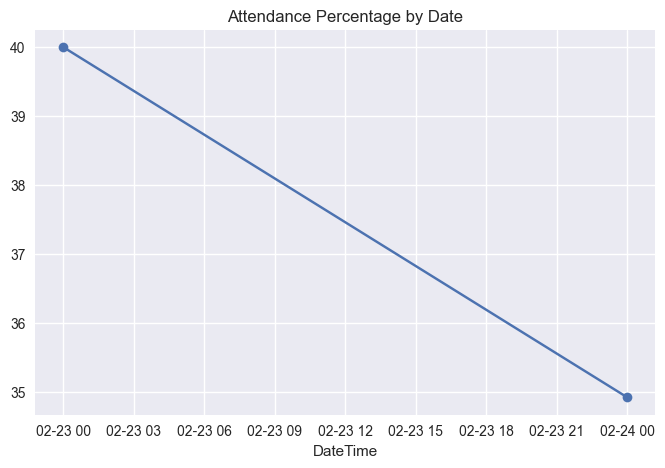

In [282]:
attendance_by_date.plot(marker="o", figsize=(8,5), title="Attendance Percentage by Date")

**4. Attendance by Lecture Time**

We analyze attendance distribution based on lecture timing.

In [284]:
attendance_by_time = (
    attendance_df
    .groupby(attendance_df['DateTime'].dt.strftime('%H:%M'))['Present']
    .mean() *100
)
attendance_by_time = attendance_by_time.sort_index()
attendance_by_time

DateTime
09:30    40.000000
11:30    34.920635
Name: Present, dtype: float64

<Axes: title={'center': 'Attendance Percentage by Lecture Hour'}, xlabel='DateTime'>

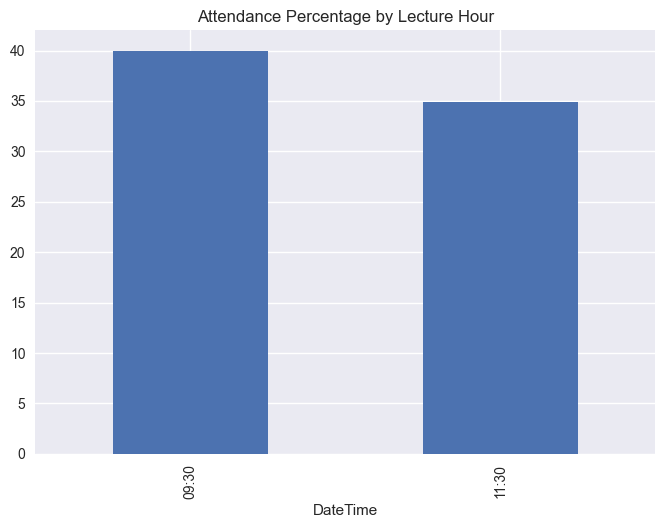

In [285]:
attendance_by_time.plot(kind="bar", title="Attendance Percentage by Lecture Hour")

**5. Student-wise Attendance Analysis**

This section identifies students with low and high attendance percentages.

In [297]:
student_attendance = (
    attendance_df
    .groupby(["PRN","Name"])["Present"]
    .mean() *100
)

student_attendance = student_attendance.sort_values()

student_attendance


PRN         Name                      
2501132001  Patil Yoksh Laxman              0.0
2501132002  Uttekar Paarth Hanumant         0.0
2501132003  Gupta Aastha Vijay              0.0
2501132004  Satvik Anand                    0.0
2501132011  Gupta Mannat Sameer             0.0
                                          ...  
2501132076  Kulthe Chinmay Lakshmikant    100.0
2501132094  Bodke Sharvari Vishal         100.0
2501132126  Shreya Gupta                  100.0
2501132131  Kisan Babulal Choudhary       100.0
2501132132  Ravi Raj                      100.0
Name: Present, Length: 63, dtype: float64

**6. Batch-wise Attendance Analysis**

This analysis compares attendance performance across batches.

In [305]:
batch_attendance = (
    attendance_df
    .groupby('Batch')['Present']
    .mean() * 100
)

batch_attendance = batch_attendance.sort_values()

print(batch_attendance)

Batch
BOTH    34.920635
D2      40.000000
Name: Present, dtype: float64
